# TRABALHO DE IAA002 - LPA

### 1 Análise Exploratória dos dados

In [52]:
# Importando as bibliotecas necessárias
import pandas as pd  # Para manipulação de dados
import seaborn as sns  # Para visualização de dados estatísticos
import matplotlib.pyplot as plt  # Para visualização gráfica
from sklearn.model_selection import train_test_split  # Para dividir os dados em conjunto de treino e teste
from sklearn.ensemble import RandomForestRegressor  # Para utilizar o algoritmo RandomForestRegressor
from xgboost import XGBRegressor  # Para utilizar o algoritmo XGBoost
from sklearn.preprocessing import LabelEncoder  # Para codificar variáveis categóricas em numéricas
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score  # Para avaliação de modelos

# Ignorando avisos de advertência para melhorar a legibilidade do código
import warnings
warnings.filterwarnings('ignore')

#### 1. a) Carregue a base de dados media_precos_carros_brasil.csv

In [11]:
# Carrega os dados do arquivo CSV para um DataFrame chamado 'dados'
dados = pd.read_csv('precos_carros_brasil.csv')
# Exibe as primeiras linhas do DataFrame 'dados'
dados.head()

,year_of_reference,month_of_reference,fipe_code,authentication,brand,model,fuel,gear,engine_size,year_model,avg_price_brl
0,2021.0,January,004001-0,cfzlctzfwrcp,GM - Chevrolet,Corsa Wind 1.0 MPFI / EFI 2p,Gasoline,manual,1,2002.0,9162.0
1,2021.0,January,004001-0,cdqwxwpw3y2p,GM - Chevrolet,Corsa Wind 1.0 MPFI / EFI 2p,Gasoline,manual,1,2001.0,8832.0
2,2021.0,January,004001-0,cb1t3xwwj1xp,GM - Chevrolet,Corsa Wind 1.0 MPFI / EFI 2p,Gasoline,manual,1,2000.0,8388.0
3,2021.0,January,004001-0,cb9gct6j65r0,GM - Chevrolet,Corsa Wind 1.0 MPFI / EFI 2p,Alcohol,manual,1,2000.0,8453.0
4,2021.0,January,004003-7,g15wg0gbz1fx,GM - Chevrolet,Corsa Pick-Up GL/ Champ 1.6 MPFI / EFI,Gasoline,manual,"1,6",2001.0,12525.0


In [12]:
# Observando número de linhas e colunas
dados.shape

(267542, 11)

#### 1. b) Verifique se há valores faltantes nos dados. Caso haja, escolha uma tratativa para resolver o problema de valores faltantes

In [26]:
# Verifica se há valores faltantes em todo o DataFrame
valores_faltantes = dados.isnull().sum()
# Exibe a quantidade de valores faltantes por coluna
print(valores_faltantes)

year_of_reference     65245
month_of_reference    65245
fipe_code             65245
authentication        65245
brand                 65245
model                 65245
fuel                  65245
gear                  65245
engine_size           65245
year_model            65245
avg_price_brl         65245
dtype: int64


In [27]:
# Tratamento de valores faltantes
dados_sem_faltantes = dados.dropna()
dados_sem_faltantes.isna().any()

year_of_reference     False
month_of_reference    False
fipe_code             False
authentication        False
brand                 False
model                 False
fuel                  False
gear                  False
engine_size           False
year_model            False
avg_price_brl         False
dtype: bool

In [23]:
# Verificando a quantidade de valores faltantes por coluna
dados_sem_faltantes.isna().sum()

year_of_reference     0
month_of_reference    0
fipe_code             0
authentication        0
brand                 0
model                 0
fuel                  0
gear                  0
engine_size           0
year_model            0
avg_price_brl         0
dtype: int64

#### 1. c) Verifique se há dados duplicados nos dados

In [29]:
# Verificando se há valores duplicados
dados_sem_faltantes.duplicated().sum()

2

In [30]:
# Removendo valores duplicados
dados_sem_faltantes.drop_duplicates(inplace=True)

In [31]:
# Verificando se os valores duplicados foram removidos
dados_sem_faltantes.duplicated().sum()

0

#### 1. d) Crie duas categorias, para separar colunas numéricas e categóricas. Imprima o resumo de informações das variáveis numéricas e categóricas (estatística descritiva dos dados)

In [40]:
# Separa as colunas numéricas e categóricas
colunas_numericas = dados_sem_faltantes.select_dtypes(include=['number'])
colunas_categoricas = dados_sem_faltantes.select_dtypes(include=['object'])

In [41]:
# Imprime o resumo das informações estatísticas das variáveis numéricas
print("Resumo das informações estatísticas das variáveis numéricas:")
colunas_numericas.describe()

Resumo das informações estatísticas das variáveis numéricas:


,year_of_reference,year_model,avg_price_brl
count,202295.000000,202295.000000,202295.000000
mean,2021.564695,2011.271514,52756.765713
std,0.571904,6.376241,51628.912116
min,2021.000000,2000.000000,6647.000000
25%,2021.000000,2006.000000,22855.000000
50%,2022.000000,2012.000000,38027.000000
75%,2022.000000,2016.000000,64064.000000
max,2023.000000,2023.000000,979358.000000


In [42]:
# Imprime o resumo das informações das variáveis categóricas
print("\nResumo das informações das variáveis categóricas:")
colunas_categoricas.describe()


Resumo das informações das variáveis categóricas:


,month_of_reference,fipe_code,authentication,brand,model,fuel,gear,engine_size
count,202295,202295,202295,202295,202295,202295,202295,202295
unique,12,2091,202295,6,2112,3,2,29
top,January,003281-6,cfzlctzfwrcp,Fiat,Palio Week. Adv/Adv TRYON 1.8 mpi Flex,Gasoline,manual,"1,6"
freq,24260,425,1,44962,425,168684,161883,47420


#### 1. e) Imprima a contagem de valores por modelo (model) e marca do carro (brand)

In [50]:
# Imprimindo a contagem de valores por marca
dados_sem_faltantes['brand'].value_counts()

brand
Fiat               44962
VW - VolksWagen    44312
GM - Chevrolet     38590
Ford               33150
Renault            29191
Nissan             12090
Name: count, dtype: int64

In [51]:
# Imprimindo a contagem de valores por modelo

dados_sem_faltantes.groupby(['brand', 'model'])['model'].value_counts()

brand            model                                   
Fiat             500 ABARTH MULTIAIR 1.4 TB 16V 3p            50
                 500 Cabrio Dualogic Flex 1.4 8V              75
                 500 Cabrio Flex 1.4 8V Mec.                  50
                 500 Cabrio/500 Coupe Gucci/Flex 1.4 Aut.    100
                 500 Cult 1.4 Flex 8V EVO Dualogic           100
                                                            ... 
VW - VolksWagen  up! move I MOTION 1.0 T. Flex 12V 3p         50
                 up! move I MOTION 1.0 T. Flex 12V 5p        125
                 up! take 1.0 T. Flex 12V 3p                 100
                 up! take 1.0 Total Flex 12V 5p              150
                 up! track 1.0 Total Flex 12V 5p              25
Name: count, Length: 2112, dtype: int64

#### 1. f) Dê um breve explicação (máximo de quatro linhas) sobre os principais resultados encontrados na Análise Exploratória dos dados

##### Inicialmente, o conjunto de dados continha 267.542 registros, dos quais 65.245 registros estavam totalmente vazios em todas as colunas e havia 2 registros duplicados. Após a remoção das linhas com valores completamente vazios e das duplicatas, restaram 202.295 registros válidos. A marca de veículos com o maior número de modelos registrados nessa base de dados é a Fiat. O veículo mais recente na base de dados tem apenas 1 ano de idade, enquanto o mais antigo possui 24 anos, resultando em uma média de aproximadamente 12 anos de idade para os veículos presentes. Em relação aos preços, o veículo mais barato registrado custa BRL 6.647,00, enquanto o mais caro é avaliado em BRL 979.358,00, resultando em uma média de aproximadamente BRL 52.756,76.

### 2 Visualização dos dados

#### 2. a) Gere um gráfico da distribuição da quantidade de carros por marca

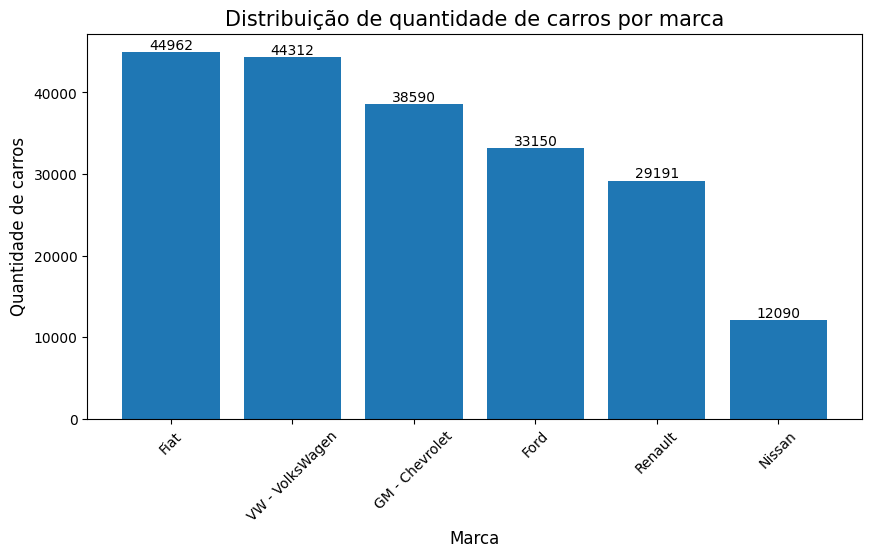

In [81]:
# Contagem da quantidade de carros por marca
brand_counts = dados_sem_faltantes['brand'].value_counts()

# Criando o gráfico de distribuição
plt.figure(figsize=(10, 5))
graph_brand_count = plt.bar(brand_counts.keys(), brand_counts)
plt.title('Distribuição de quantidade de carros por marca', fontsize=15)
plt.ylabel('Quantidade de carros', fontsize=12)
plt.xlabel('Marca', fontsize=12)
plt.xticks(fontsize=10, rotation=45)  # Rotaciona os rótulos no eixo x para melhor visualização
plt.yticks(fontsize=10)

# Adicionando rótulos com a quantidade de carros em cada barra
for bar in graph_brand_count:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval), va='bottom', ha='center', fontsize=10)

plt.show()

#### 2. b) Gere um gráfico da distribuição da quantidade de carros por tipo de engrenagem do carro

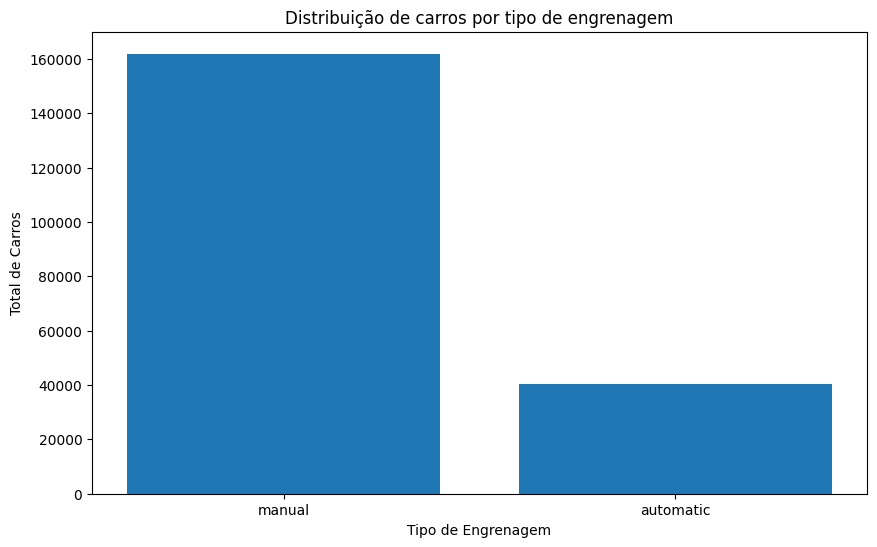

In [82]:
# Montar parâmetros para o gráfico
carros_por_engrenagem = dados_sem_faltantes['gear'].value_counts()
labels = dados_sem_faltantes['gear'].value_counts().index.tolist()

# Criando o gráfico de distribuição
plt.figure(figsize=(10, 6))
plt.bar(labels, carros_por_engrenagem)
plt.title('Distribuição de carros por tipo de engrenagem')
plt.ylabel('Total de Carros')
plt.xlabel('Tipo de Engrenagem')
plt.show()

#### 2. c) Gere um gráfico da evolução da média de preço dos carros ao longo dos meses de 2022 (variável de tempo no eixo X)

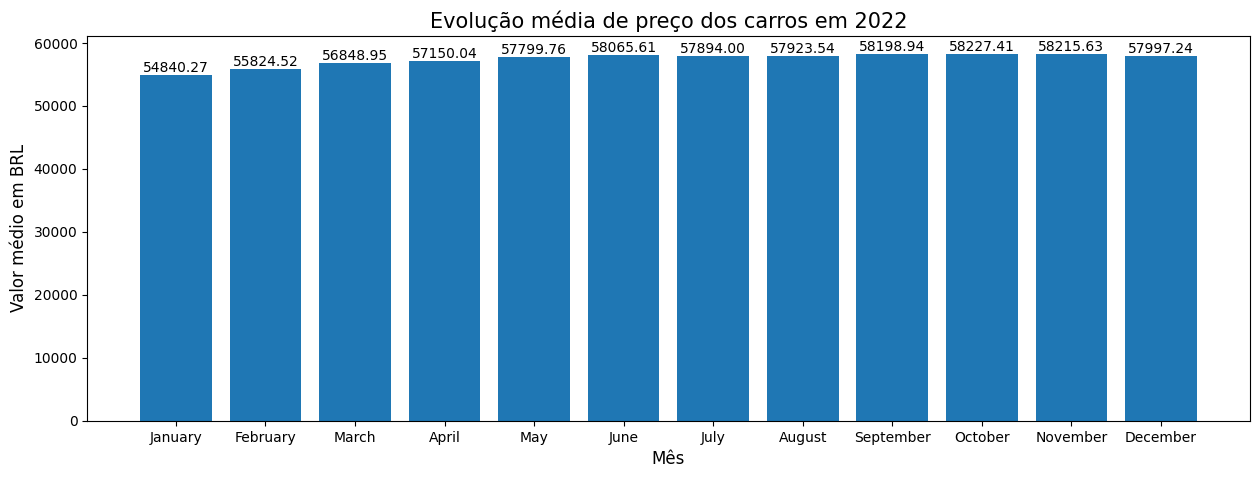

In [84]:
# Separando os dados referentes ao ano de 2022
media_preco_2022 = dados_sem_faltantes.where(dados_sem_faltantes['year_of_reference'] == 2022).groupby('month_of_reference')['avg_price_brl'].mean().round(2)

# Reindexando a série conforme os meses do ano
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
media_preco_2022 = media_preco_2022.reindex(month_order)
media_preco_2022

# Criando o gráfico 'Evolução média de preço dos carros em 2022'
plt.figure(figsize=(15, 5))
graph_monthly_price = plt.bar(media_preco_2022.index, media_preco_2022.values)
plt.title('Evolução média de preço dos carros em 2022', fontsize=15)
plt.ylabel('Valor médio em BRL', fontsize=12)
plt.xlabel('Mês', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Adicionando rótulos com o valor médio em cada barra
for bar in graph_monthly_price:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.2f}', va='bottom', ha='center', fontsize=10)

plt.show()

#### 2. d) Gere um gráfico da distribuição da média de preço dos carros por marca e tipo de engrenagem

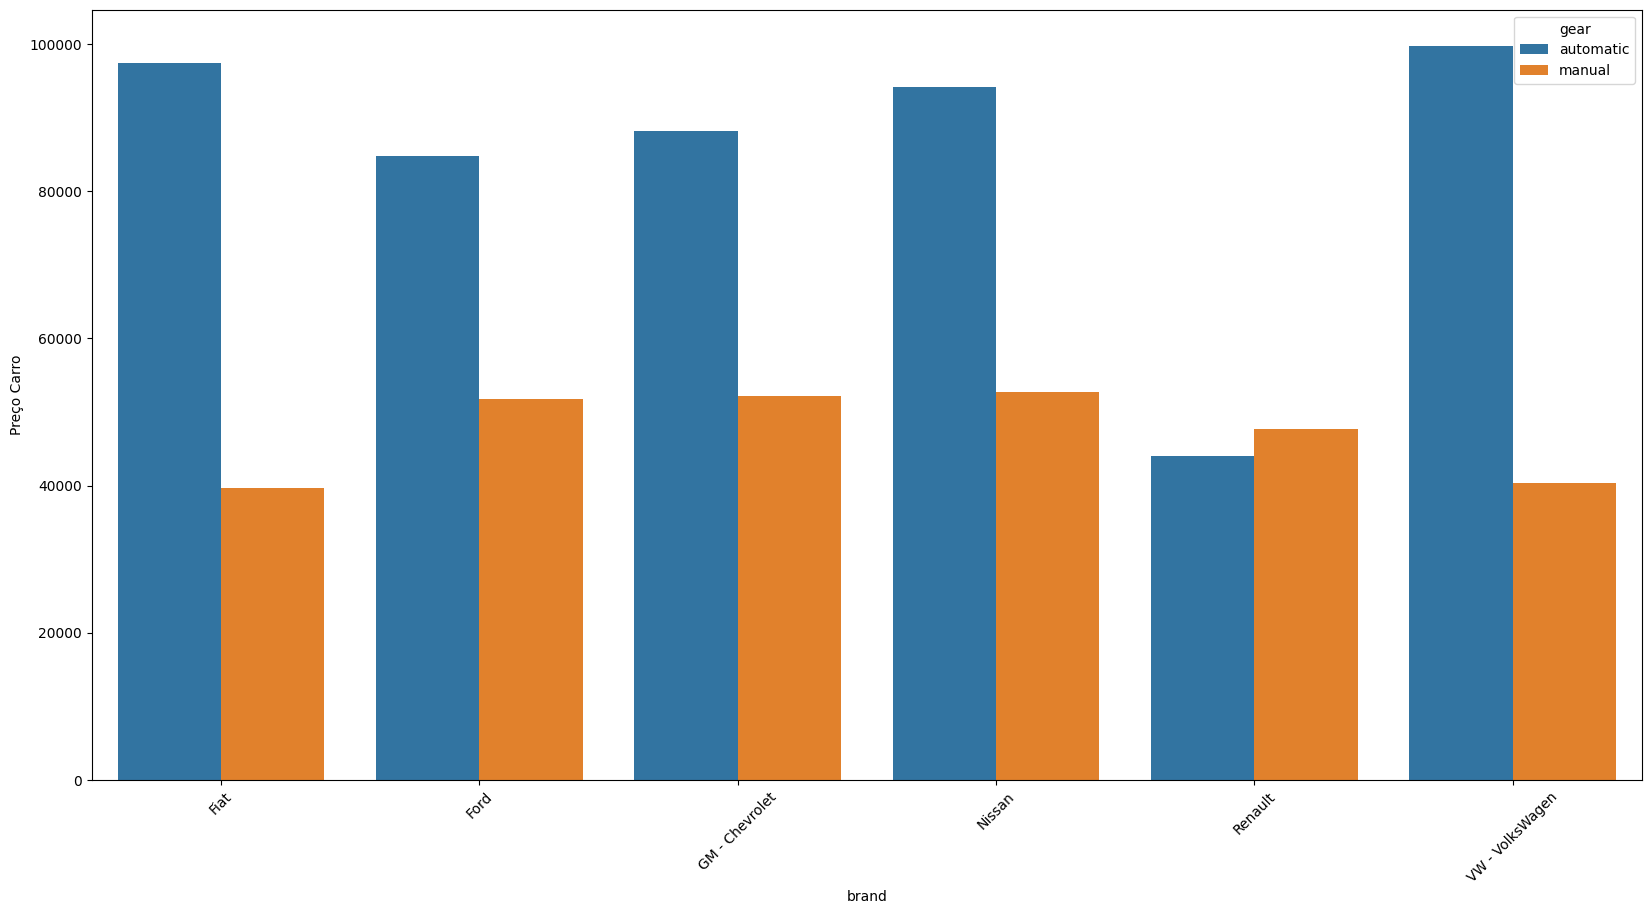

In [92]:
# Calculando a média de preço por marca e tipo de engrenagem
media_preco_carro_marca_engrenagem = dados_sem_faltantes.groupby(['brand', 'gear'])['avg_price_brl'].mean().round(0).reset_index(name='Preço Carro')

# Visualizando a distribuição de marca por tipo de cambio
plt.figure(figsize=(20,10)) # Aumentar tamanho da imagem que será impressa na tela
sns.barplot(x='brand', y='Preço Carro', hue='gear', data=media_preco_carro_marca_engrenagem, hue_order=['automatic', 'manual'])
plt.xticks(rotation=45);

#### 2. e) Dê uma breve explicação (máximo de quatro linhas) sobre os resultados gerados no item d

##### No item d, foram analisadas as médias de preço dos carros por marca e tipo de engrenagem. Podemos observar que , em geral, veículos com engrenagem manual têm preços mais baixos, mas houve uma exceção notável com os veículos da marca Renault, cujos modelos automáticos foram mais baratos que os manuais. Essa diferença pode estar relacionada à idade dos modelos e às políticas de precificação da marca.

#### 2. f) Gere um gráfico da distribuição da média de preço dos carros por marca e tipo de combustível

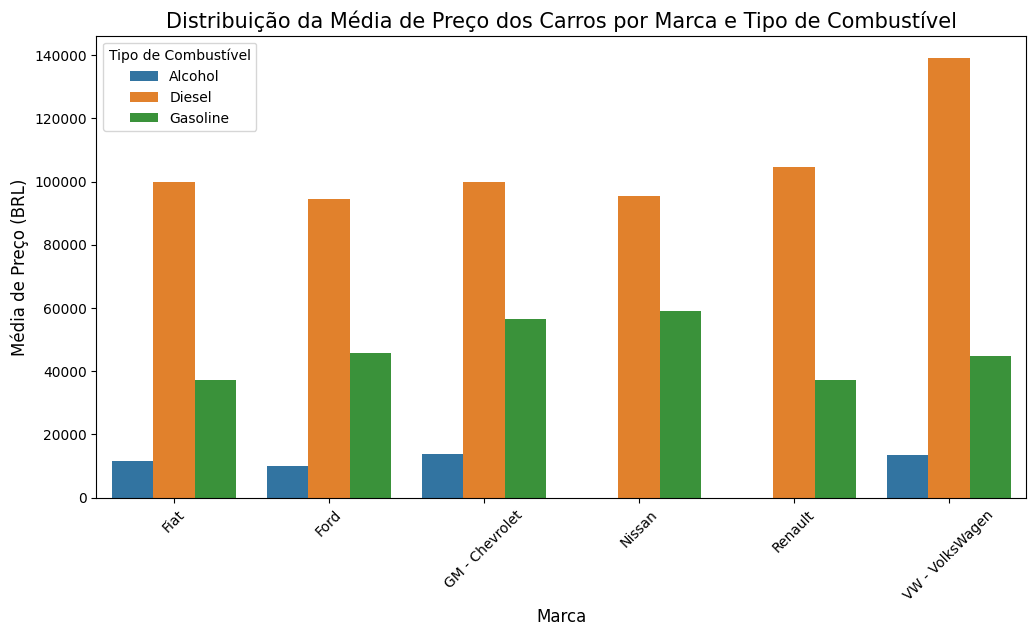

In [93]:
# Calculando a média de preço por marca e tipo de combustível
media_preco_carro_marca_combustivel = dados_sem_faltantes.groupby(['brand', 'fuel'])['avg_price_brl'].mean().round(0).reset_index(name='Preço Carro')

# Criando o gráfico da distribuição da média de preço por marca e tipo de combustível
plt.figure(figsize=(12, 6))
sns.barplot(x='brand', y='Preço Carro', hue='fuel', data=media_preco_carro_marca_combustivel, hue_order=['Alcohol', 'Diesel', 'Gasoline'])
plt.title('Distribuição da Média de Preço dos Carros por Marca e Tipo de Combustível', fontsize=15)
plt.xlabel('Marca', fontsize=12)
plt.ylabel('Média de Preço (BRL)', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Tipo de Combustível')
plt.show()

#### 2. g) Dê uma breve explicação (máximo de quatro linhas) sobre os resultados gerados no item f

##### A análise dos dados revela que os veículos a diesel, independentemente da marca, possuem, em média, os preços mais elevados. Esse padrão pode ser explicado pelo fato de que veículos movidos a diesel tendem a ser de grande porte, como camionetes e caminhões, e, consequentemente, mais caros. Além disso, observa-se que algumas marcas não oferecem veículos movidos exclusivamente a álcool, o que pode estar relacionado à antiguidade desses modelos e contribuir para os preços mais baixos. É importante notar que, embora muitos veículos sejam atualmente flex, na tabela FIPE (de onde os dados foram extraídos), esses veículos são identificados como movidos a gasolina.

### 3 Aplicação de modelos de machine learning para prever o preço médio dos carros

#### 3. a) Escolha as variáveis numéricas (modelos de Regressão) para serem as variáveis independentes do modelo.A variável target é avg_price. Observação: caso julgue necessário, faça a transformação de variáveis categóricas em variáveis numéricas para inputar no modelo. Indique quais variáveis foram transformadas e como foram transformadas

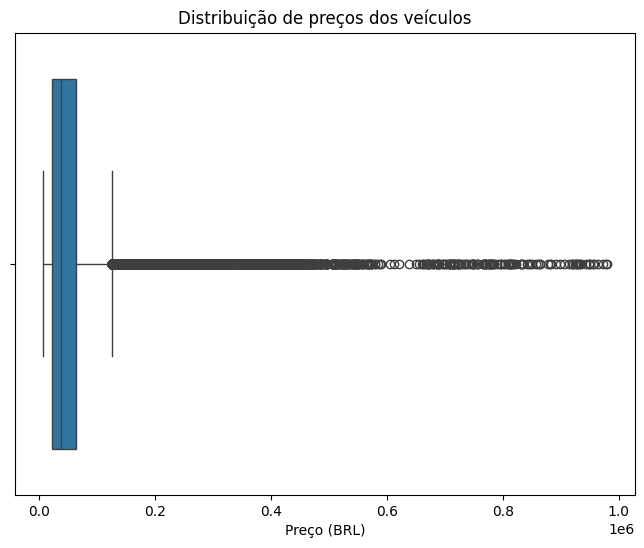

In [94]:
# Transformação das variáveis categóricas em variáveis numéricas
dados_transformados = pd.get_dummies(dados_sem_faltantes, columns=['brand', 'gear'], drop_first=True)

# Verificação das variáveis transformadas
dados_transformados.head()

plt.figure(figsize=(8, 6))
sns.boxplot(x=dados_sem_faltantes['avg_price_brl'])
plt.title('Distribuição de preços dos veículos')
plt.xlabel('Preço (BRL)')
plt.show()

In [96]:
# Criando colunas para transformação dos valores categóricos em numéricos
# OBS: no caso de 'month_of_reference' a transformação será feita com base na ordem dos meses

dados_sem_faltantes['month_of_reference_num'] = dados_sem_faltantes['month_of_reference'].apply(lambda x: month_order.index(x))
dados_sem_faltantes['fuel_num'] = LabelEncoder().fit_transform(dados_sem_faltantes['fuel'])
dados_sem_faltantes['gear_num'] = LabelEncoder().fit_transform(dados_sem_faltantes['gear'])

dados_sem_faltantes.head()

,year_of_reference,month_of_reference,fipe_code,authentication,brand,model,fuel,gear,engine_size,year_model,avg_price_brl,month_of_reference_num,fuel_num,gear_num
0,2021.0,January,004001-0,cfzlctzfwrcp,GM - Chevrolet,Corsa Wind 1.0 MPFI / EFI 2p,Gasoline,manual,1,2002.0,9162.0,0,2,1
1,2021.0,January,004001-0,cdqwxwpw3y2p,GM - Chevrolet,Corsa Wind 1.0 MPFI / EFI 2p,Gasoline,manual,1,2001.0,8832.0,0,2,1
2,2021.0,January,004001-0,cb1t3xwwj1xp,GM - Chevrolet,Corsa Wind 1.0 MPFI / EFI 2p,Gasoline,manual,1,2000.0,8388.0,0,2,1
3,2021.0,January,004001-0,cb9gct6j65r0,GM - Chevrolet,Corsa Wind 1.0 MPFI / EFI 2p,Alcohol,manual,1,2000.0,8453.0,0,0,1
4,2021.0,January,004003-7,g15wg0gbz1fx,GM - Chevrolet,Corsa Pick-Up GL/ Champ 1.6 MPFI / EFI,Gasoline,manual,"1,6",2001.0,12525.0,0,2,1


In [98]:
# Escolhendo as variávies numéricas

non_numeric_cols = [col for col in dados_sem_faltantes.columns if dados_sem_faltantes[col].dtype == 'object']
data_num = dados_sem_faltantes.drop(non_numeric_cols, axis=1)
data_num.head()

,year_of_reference,year_model,avg_price_brl,month_of_reference_num,fuel_num,gear_num
0,2021.0,2002.0,9162.0,0,2,1
1,2021.0,2001.0,8832.0,0,2,1
2,2021.0,2000.0,8388.0,0,2,1
3,2021.0,2000.0,8453.0,0,0,1
4,2021.0,2001.0,12525.0,0,2,1


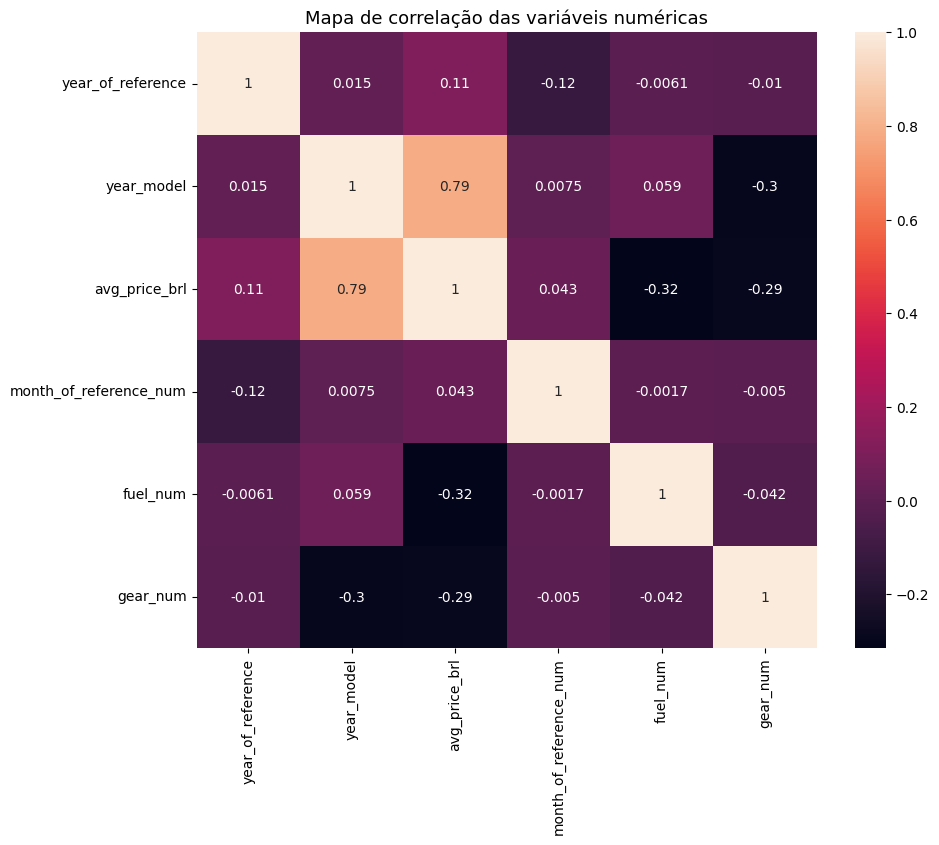

In [99]:
# Verificando a correlação das variáveis númericas com a variável alvo (avg_price_brl) através de um mapa de correlação das variáveis numéricas

plt.figure(figsize=(10, 8))
sns.heatmap(data_num.corr('spearman'), annot=True)
plt.title('Mapa de correlação das variáveis numéricas', fontsize=13)
plt.show()

#### 3. b) Crie partições contendo 75% dos dados para treino e 25% para teste

In [105]:
# Criação de uma variável X que contenha as variáveis independentes
X = data_num.drop(['avg_price_brl'], axis=1)
X.head()

,year_of_reference,year_model,month_of_reference_num,fuel_num,gear_num
0,2021.0,2002.0,0,2,1
1,2021.0,2001.0,0,2,1
2,2021.0,2000.0,0,2,1
3,2021.0,2000.0,0,0,1
4,2021.0,2001.0,0,2,1


In [106]:
# Criação de uma variável Y que contenha a variável alvo
Y = data_num['avg_price_brl']
Y.head()

0     9162.0
1     8832.0
2     8388.0
3     8453.0
4    12525.0
Name: avg_price_brl, dtype: float64

In [107]:
# Separação das variáveis de treino e teste (75% para treino e 25% para teste)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=182)

In [108]:
# Verificação dos dados de teste

print(X_test.shape)
X_test.head()

(50574, 5)


,year_of_reference,year_model,month_of_reference_num,fuel_num,gear_num
61916,2021.0,2020.0,7,2,0
165711,2022.0,2013.0,8,2,1
191367,2022.0,2004.0,11,2,1
104898,2022.0,2006.0,1,2,1
168713,2022.0,2011.0,8,2,1


#### 3. c) Treine modelos RandomForest (biblioteca RandomForestRegressor) e XGBoost (biblioteca XGBRegressor) para predição dos preços dos carros. Observação: caso julgue necessário, mude os parâmetros dos modelos e rode novos modelos. Indique quais parâmetros foram inputados e indique o treinamento de cada modelo

In [109]:
# Random Forest sem especificar os parâmetros
model_rf = RandomForestRegressor()
model_rf.fit(X_train, Y_train)

RandomForestRegressor()

In [110]:
# Random Forest especificando alguns parâmetros
model_rf_parameters = RandomForestRegressor(min_samples_leaf = 32, min_samples_split=28, n_estimators=1182, random_state=44)
model_rf_parameters.fit(X_train, Y_train)

RandomForestRegressor(min_samples_leaf=32, min_samples_split=28,
                      n_estimators=1182, random_state=44)

In [111]:
# XGBoost sem especificar os parâmetros
model_xgboost = XGBRegressor()
model_xgboost.fit(X_train, Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [112]:
# XGBoost especificando alguns parâmetros
model_xgboost_parameters = XGBRegressor(n_estimators=1020, max_depth=0, learning_rate=0.1, subsample=0.8, colsample_bytree=0.8, gamma=0, reg_alpha=0, reg_lambda=1)
model_xgboost_parameters.fit(X_train, Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=0, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=0, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1020, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

#### 3. d) Grave os valores preditos em variáveis criadas

In [113]:
# Predição dos valores de teste com Random Forest sem especificar os parâmetros
predicted_values_rf = model_rf.predict(X_test)
predicted_values_rf

array([92655.44792249, 43361.76299559, 22746.95548329, ...,
       45008.74620411, 32418.58042968, 82429.21874273])

In [114]:
# Predição dos valores de teste com Random Forest especificando alguns parâmetros
predicted_values_rf_parameters = model_rf_parameters.predict(X_test)
predicted_values_rf_parameters

array([92640.25885748, 43473.6361319 , 22808.99167164, ...,
       45144.28241554, 32411.34406212, 82334.34233951])

In [115]:
# Predição dos valores de teste com XGBoost sem especificar os parâmetros
predicted_values_xgboost = model_xgboost.predict(X_test)
predicted_values_xgboost

array([92653.734, 43348.793, 22365.953, ..., 44943.387, 33043.062,
       81855.57 ], dtype=float32)

In [116]:
# Predição dos valores de teste com XGBoost especificando alguns parâmetros
predicted_values_xgboost_parameters = model_xgboost_parameters.predict(X_test)
predicted_values_xgboost_parameters

array([92583.625, 43550.15 , 22817.71 , ..., 45548.785, 32820.03 ,
       81794.07 ], dtype=float32)

#### 3. e) Realize a análise de importância das variáveis para estimar a variável target, para cada modelo treinado

In [117]:
# Análise de importância das variáveis com Random Forest sem especificar os parâmetros
importances_rf = pd.DataFrame(model_rf.feature_importances_, index=X_train.columns, columns=['importance']).sort_values('importance', ascending=False)
importances_rf

,importance
year_model,0.617276
fuel_num,0.312766
gear_num,0.039019
year_of_reference,0.016994
month_of_reference_num,0.013945


In [118]:
# Análise de importância das variáveis com Random Forest especificando alguns parâmetros
importances_rf_parameters = pd.DataFrame(model_rf_parameters.feature_importances_, index=X_train.columns, columns=['importance']).sort_values('importance', ascending=False)
importances_rf_parameters

,importance
year_model,0.617927
fuel_num,0.314291
gear_num,0.038810
year_of_reference,0.016642
month_of_reference_num,0.012330


In [119]:
# Análise de importância das variáveis com XGBoost sem especificar os parâmetros
importances_xgboost = pd.DataFrame(model_xgboost.feature_importances_, index=X_train.columns, columns=['importance']).sort_values('importance', ascending=False)
importances_xgboost

,importance
fuel_num,0.538963
year_model,0.366497
gear_num,0.071059
year_of_reference,0.020028
month_of_reference_num,0.003453


In [120]:
# Análie de importância das variáveis com XGBoost especificando alguns parâmetros
importances_xgboost_parameters = pd.DataFrame(model_xgboost_parameters.feature_importances_, index=X_train.columns, columns=['importance']).sort_values('importance', ascending=False)
importances_xgboost_parameters

,importance
fuel_num,0.365556
year_model,0.303023
gear_num,0.217745
year_of_reference,0.074351
month_of_reference_num,0.039324


#### 3. f) Dê uma breve explicação (máximo de quatro linhas) sobre os resultados encontrados na análise de importância de variáveis
##### Com exceção do modelo XGBoost com parâmetros, em todos os outros modelos analisados a variável engine_size demonstrou maior importância. No Random Forest, há uma variação notável quando parâmetros específicos são especificados: model_age torna-se mais importante que year_model, e fuel também ganha importância em relação a gear. Porém, no modelo XGBoost com parâmetros, a importância global de todas as variáveis diminui em relação ao XGBoost sem especificação de parâmetros

#### 3. g) Escolha o melhor modelo com base nas métricas de avaliação MSE, MAE e R2

In [121]:
# Inicializando os modelos
rf_model = RandomForestRegressor(random_state=42)
xgb_model = XGBRegressor(random_state=42)

# Treinando os modelos
rf_model.fit(X_train, Y_train)
xgb_model.fit(X_train, Y_train)

# Fazendo previsões nos dados de teste
rf_preds = rf_model.predict(X_test)
xgb_preds = xgb_model.predict(X_test)

# Calculando as métricas de avaliação para Random Forest
rf_mse = mean_squared_error(Y_test, rf_preds)
rf_mae = mean_absolute_error(Y_test, rf_preds)
rf_r2 = r2_score(Y_test, rf_preds)

# Calculando as métricas de avaliação para XGBoost
xgb_mse = mean_squared_error(Y_test, xgb_preds)
xgb_mae = mean_absolute_error(Y_test, xgb_preds)
xgb_r2 = r2_score(Y_test, xgb_preds)

# Comparando as métricas dos dois modelos
print('Random Forest Metrics:')
print(f'MSE: {rf_mse:.2f}')
print(f'MAE: {rf_mae:.2f}')
print(f'R2 Score: {rf_r2:.2f}\n')

print('XGBoost Metrics:')
print(f'MSE: {xgb_mse:.2f}')
print(f'MAE: {xgb_mae:.2f}')
print(f'R2 Score: {xgb_r2:.2f}\n')

# Escolhendo o melhor modelo com base nas métricas
if rf_mse < xgb_mse and rf_mae < xgb_mae and rf_r2 > xgb_r2:
    print('O melhor modelo é Random Forest.')
elif xgb_mse < rf_mse and xgb_mae < rf_mae and xgb_r2 > rf_r2:
    print('O melhor modelo é XGBoost.')
else:
    print('Os modelos têm desempenhos semelhantes.')

Random Forest Metrics:
MSE: 1102233456.66
MAE: 13615.11
R2 Score: 0.57

XGBoost Metrics:
MSE: 1094437340.12
MAE: 13518.45
R2 Score: 0.57

O melhor modelo é XGBoost.


#### 3. h) Dê uma breve explicação (máximo de quatro linhas) sobre qual modelo gerou o melhor resultado e a métrica de avaliação utilizada
##### O modelo que gerou o melhor resultado foi o XGBoost Regressor, com base na métrica de avaliação R2 (R-squared). Isso significa que o modelo XGBoost teve um desempenho superior em explicar a variação na variável target (avg_price_brl) em comparação ao Random Forest Regressor, quando consideramos a relação entre a variabilidade explicada pelo modelo e a variabilidade total dos dados.